# Importando el dataset

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv("diabetes_data.csv")
display(df[0:2].T)

,0,1
Age,4.0,12.0
Sex,1.0,1.0
HighChol,0.0,1.0
CholCheck,1.0,1.0
BMI,26.0,26.0
Smoker,0.0,1.0
HeartDiseaseorAttack,0.0,0.0
PhysActivity,1.0,0.0
Fruits,0.0,1.0
Veggies,1.0,0.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

# Exploración de Datos


In [37]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [38]:
unique_vals=[]

for col in df.columns:
    unival=df[col].nunique()
    unique_vals.append(unival)

pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df.columns)

,Unique_Values
Age,13
Sex,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


In [39]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


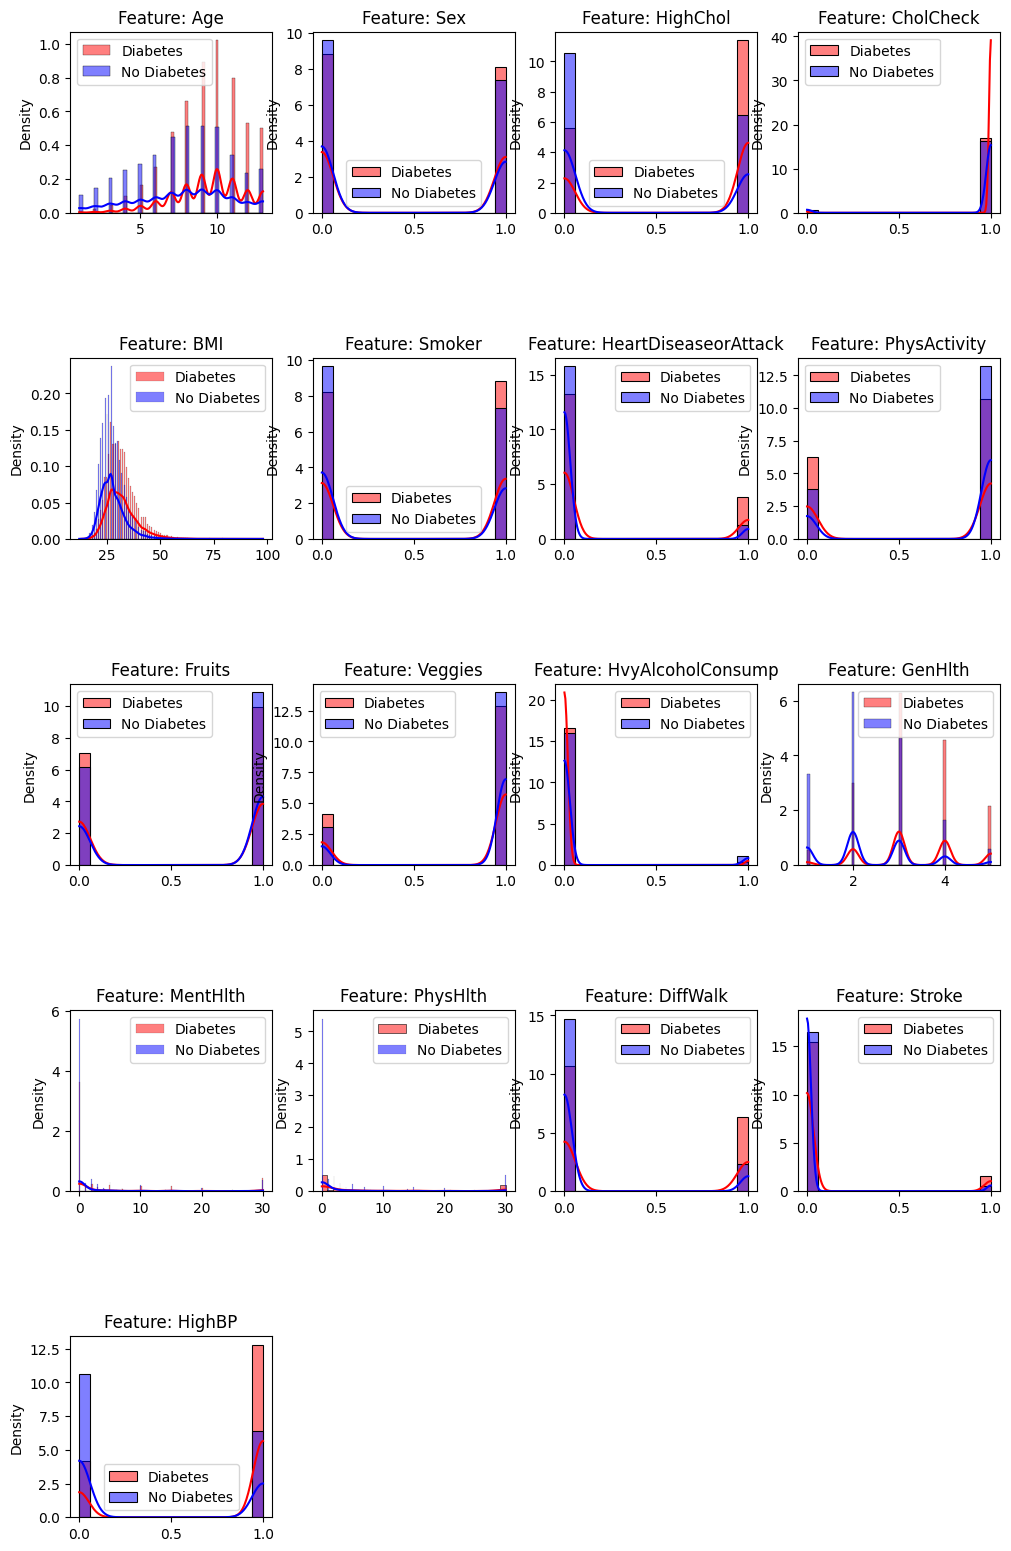

In [46]:
import matplotlib.gridspec as gridspec

# Representamos gráficamente las características
features = df.drop("Diabetes", axis=1)

plt.figure(figsize=(12, 32))
gs = gridspec.GridSpec(8, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    # Usando histplot para los casos donde Class == 1
    sns.histplot(data=df[df["Diabetes"] == 1], x=f, kde=True, color="red", stat="density", label="Diabetes", alpha=0.5)
    # Usando histplot para los casos donde Class == 0
    sns.histplot(data=df[df["Diabetes"] == 0], x=f, kde=True, color="blue", stat="density", label="No Diabetes", alpha=0.5)
    ax.set_xlabel('')
    ax.set_title(f"Feature: {f}")
    ax.legend()

plt.show()

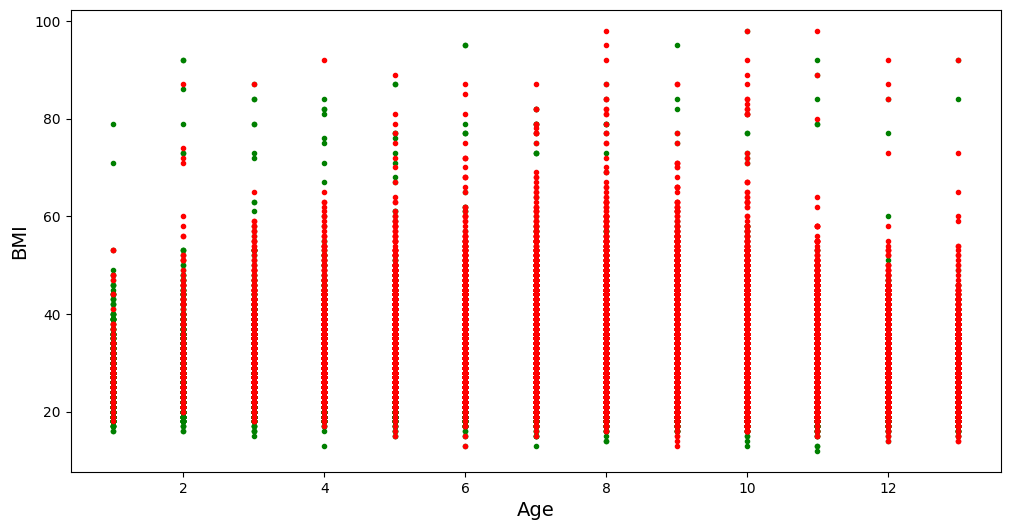

In [49]:
# Representación gráfica de dos características
plt.figure(figsize=(12, 6))
plt.scatter(df["Age"][df['Diabetes'] == 0], df["BMI"][df['Diabetes'] == 0], c="g", marker=".")
plt.scatter(df["Age"][df['Diabetes'] == 1], df["BMI"][df['Diabetes'] == 1], c="r", marker=".")
plt.xlabel("Age", fontsize=14)
plt.ylabel("BMI", fontsize=14)
plt.show()

# Inicio

## Funciones Auxiliares

In [56]:
def plot_data(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'k.', markersize=2)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, y, resolution=1000, show_centroids=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X, y)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

In [42]:
X = df.drop('Diabetes', axis=1)

In [43]:
# Normaliza los datos

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

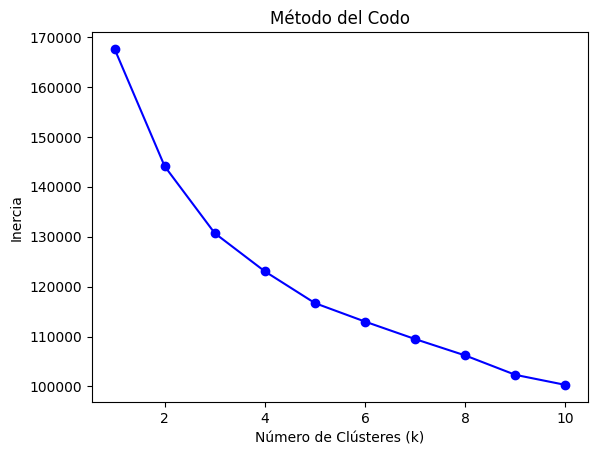

In [44]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# KMeans con un conjunto de dos dimensiones

In [69]:
X = df[["BMI", "Age"]].copy()

In [70]:
X

,BMI,Age
0,26.0,4.0
1,26.0,12.0
2,26.0,13.0
3,28.0,11.0
4,29.0,8.0
...,...,...
70687,37.0,6.0
70688,29.0,10.0
70689,25.0,13.0
70690,18.0,11.0


In [71]:
X_normalized = scaler.fit_transform(X)

In [74]:
X_normalized

array([[0.1627907 , 0.25      ],
       [0.1627907 , 0.91666667],
       [0.1627907 , 1.        ],
       ...,
       [0.15116279, 1.        ],
       [0.06976744, 0.83333333],
       [0.15116279, 0.66666667]])

In [72]:
# Generamos los clusters para nuestro conjunto de datos sin etiquetar
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

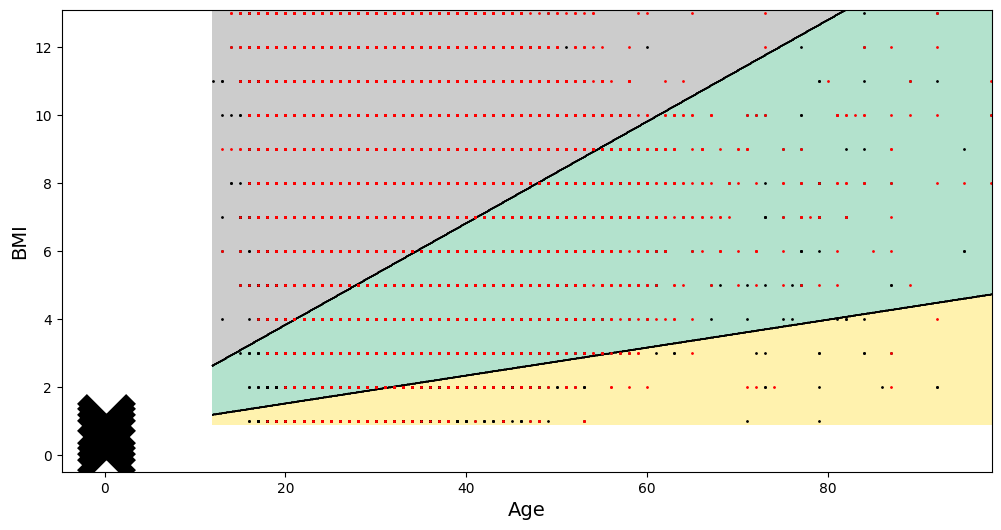

In [73]:
plt.figure(figsize=(12, 6))
plot_decision_boundaries(kmeans, X.values, df["Diabetes"].values)
plt.xlabel("Age", fontsize=14)
plt.ylabel("BMI", fontsize=14)
plt.show()

In [60]:
from collections import Counter

counter = Counter(clusters.tolist())
bad_counter = Counter(clusters[df['Diabetes'] == 1].tolist())

for key in sorted(counter.keys()):
    print("Label {0} has {1} samples - {2} are malicious samples".format(
        key, counter[key], bad_counter[key]))

Label 0 has 25107 samples - 15002 are malicious samples
Label 1 has 10564 samples - 7653 are malicious samples
Label 2 has 11674 samples - 1899 are malicious samples
Label 3 has 21798 samples - 9595 are malicious samples
Label 4 has 1549 samples - 1197 are malicious samples


# Kmeans con un conjunto de datos multidimensional


In [75]:
X = df.drop("Diabetes", axis=1)
y = df["Diabetes"].copy()

In [76]:
X_normalized = scaler.fit_transform(X)

In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

In [78]:
# Evaluamos los clusters y el contenido que se han formado
counter = Counter(clusters.tolist())
bad_counter = Counter(clusters[y == 1].tolist())

for key in sorted(counter.keys()):
    print("Label {0} has {1} samples - {2} are malicious samples".format(
        key, counter[key], bad_counter[key]))

Label 0 has 10271 samples - 2929 are malicious samples
Label 1 has 13779 samples - 8244 are malicious samples
Label 2 has 17918 samples - 4129 are malicious samples
Label 3 has 14889 samples - 9371 are malicious samples
Label 4 has 13835 samples - 10673 are malicious samples


#Reducciónd el número de características

En muchas ocasiones Kmeans funciona mejor con un número de características bajo.

In [88]:
# Utilizamos Random Forest para realizar selección de características
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X, y)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [89]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(df), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

In [90]:
# Reducimos el conjunto de datos a las 7 características más importantes
X_reduced = X[list(feature_importances_sorted.head(7).index)].copy()

In [91]:
X_reduced

,BMI,Age,GenHlth,HighBP,PhysHlth,MentHlth,HighChol
0,26.0,4.0,3.0,1.0,30.0,5.0,0.0
1,26.0,12.0,3.0,1.0,0.0,0.0,1.0
2,26.0,13.0,1.0,0.0,10.0,0.0,0.0
3,28.0,11.0,3.0,1.0,3.0,0.0,1.0
4,29.0,8.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
70687,37.0,6.0,4.0,0.0,0.0,0.0,1.0
70688,29.0,10.0,2.0,0.0,0.0,0.0,1.0
70689,25.0,13.0,5.0,1.0,0.0,15.0,1.0
70690,18.0,11.0,4.0,1.0,0.0,0.0,1.0


# Entrenamiento de KMeans con el conjunto de datos reducido

In [92]:
X_normalized = scaler.fit_transform(X_reduced)

In [93]:
X_normalized

array([[0.1627907 , 0.25      , 0.5       , ..., 1.        , 0.16666667,
        0.        ],
       [0.1627907 , 0.91666667, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.1627907 , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       ...,
       [0.15116279, 1.        , 1.        , ..., 0.        , 0.5       ,
        1.        ],
       [0.06976744, 0.83333333, 0.75      , ..., 0.        , 0.        ,
        1.        ],
       [0.15116279, 0.66666667, 0.25      , ..., 0.        , 0.        ,
        1.        ]])

In [94]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

In [95]:
# Evaluamos los clusters y el contenido que se han formado
counter = Counter(clusters.tolist())
bad_counter = Counter(clusters[y == 1].tolist())

for key in sorted(counter.keys()):
    print("Label {0} has {1} samples - {2} are malicious samples".format(
        key, counter[key], bad_counter[key]))

Label 0 has 4405 samples - 2244 are malicious samples
Label 1 has 37712 samples - 13843 are malicious samples
Label 2 has 8272 samples - 5769 are malicious samples
Label 3 has 3905 samples - 2834 are malicious samples
Label 4 has 16398 samples - 10656 are malicious samples
